In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [51]:
homeprice=pd.read_csv('../Inputs/GDPInputs/Sale_Prices_Zip.csv')
business=pd.read_csv('../Inputs/GDPInputs/Licensed_Businesses_WA.csv')
pot_sales=pd.read_csv('../Inputs/GDPInputs/Sales_and_Tax_Report_WA.csv')
us_states_hp=pd.read_csv('../Inputs/GDPInputs/Sale_Prices_State.csv')

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
us_wa_hp=us_states_hp.loc[(us_states_hp['RegionName']== 'Washington') | (us_states_hp['RegionName']== 'United States'),['RegionName','2008-03','2008-04','2008-05','2008-06','2008-07',
 '2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08',
 '2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09',
 '2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10',
 '2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11',
 '2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
 '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01',
 '2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02',
 '2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03',
 '2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04',
 '2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11']]

In [53]:
us_wa_hp.head()

,RegionName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,United States,188300.0,184700.0,180700.0,176800.0,175100.0,174200.0,173200.0,171500.0,169300.0,...,229400.0,232500.0,232300.0,229700.0,227600.0,226700.0,226200.0,226100.0,225900.0,NaN
13,Washington,283600.0,278100.0,270000.0,262500.0,258400.0,257700.0,255800.0,254700.0,252000.0,...,345500.0,350200.0,356000.0,353300.0,350000.0,346400.0,343600.0,344100.0,345900.0,348100.0


In [54]:
us_wa_hp.set_index('RegionName',inplace=True)


In [55]:
us_wa_hp=us_wa_hp.transpose()
us_wa_hp.reset_index(inplace=True)
us_wa_hp[['Year','Month']]=us_wa_hp['index'].str.split('-',expand=True)
us_wa_hp

RegionName,index,United States,Washington,Year,Month
0,2008-03,188300.0,283600.0,2008,03
1,2008-04,184700.0,278100.0,2008,04
2,2008-05,180700.0,270000.0,2008,05
3,2008-06,176800.0,262500.0,2008,06
4,2008-07,175100.0,258400.0,2008,07
5,2008-08,174200.0,257700.0,2008,08
6,2008-09,173200.0,255800.0,2008,09
7,2008-10,171500.0,254700.0,2008,10
8,2008-11,169300.0,252000.0,2008,11
9,2008-12,166400.0,254200.0,2008,12


[Year
 2008    258050.0
 2009    239550.0
 2010    240050.0
 2011    216100.0
 2012    224600.0
 2013    246250.0
 2014    252850.0
 2015    271800.0
 2016    292250.0
 2017    318550.0
 2018    346400.0
 Name: Washington, dtype: float64, Year
 2008    174650.0
 2009    157750.0
 2010    158600.0
 2011    149650.0
 2012    154800.0
 2013    171000.0
 2014    177800.0
 2015    192250.0
 2016    199950.0
 2017    211800.0
 2018    227150.0
 Name: United States, dtype: float64]

In [62]:
us_wa_avg=pd.DataFrame(data=[us_wa_hp.groupby('Year')['Washington'].median(),us_wa_hp.groupby('Year')['United States'].median()]).transpose()
us_wa_avg

,Washington,United States
Year,,
2008,258050.0,174650.0
2009,239550.0,157750.0
2010,240050.0,158600.0
2011,216100.0,149650.0
2012,224600.0,154800.0
2013,246250.0,171000.0
2014,252850.0,177800.0
2015,271800.0,192250.0
2016,292250.0,199950.0


In [63]:
us_wa_avg['WA_Percent_Change']=us_wa_avg['Washington'].pct_change()*100
us_wa_avg['US_Percent_Change']=us_wa_avg['United States'].pct_change()*100
us_wa_avg

,Washington,United States,WA_Percent_Change,US_Percent_Change
Year,,,,
2008,258050.0,174650.0,NaN,NaN
2009,239550.0,157750.0,-7.169153,-9.676496
2010,240050.0,158600.0,0.208725,0.538827
2011,216100.0,149650.0,-9.977088,-5.643127
2012,224600.0,154800.0,3.933364,3.441363
2013,246250.0,171000.0,9.639359,10.465116
2014,252850.0,177800.0,2.680203,3.976608
2015,271800.0,192250.0,7.494562,8.127109
2016,292250.0,199950.0,7.523915,4.005202


In [6]:
wa_all_hp=homeprice.loc[homeprice['StateName']=='Washington',['RegionName','2008-03','2008-04','2008-05','2008-06','2008-07',
 '2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08',
 '2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09',
 '2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10',
 '2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11',
 '2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
 '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01',
 '2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02',
 '2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03',
 '2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04',
 '2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11']]
wa_all_hp.rename(columns={'RegionName':'Zip_AverageHomeSale'},inplace=True)
wa_all_hp.set_index('Zip_AverageHomeSale',inplace=True)
wa_all_hp=wa_all_hp.transpose()
wa_all_hp.head()

Zip_AverageHomeSale,98052,98012,98103,98682,98133,99208,98122,98208,98034,98109,...,98446,98252,98328,98327,98418,99026,98580,98606,98329,98629
2008-03,431100.0,384900.0,NaN,225100.0,318100.0,208400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,429300.0,375100.0,NaN,221700.0,338700.0,213800.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,419000.0,364300.0,NaN,218100.0,322100.0,207400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,412800.0,374900.0,NaN,213700.0,336900.0,202900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,413100.0,368100.0,NaN,216400.0,332500.0,199500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
business.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
0,BEAUSOLEIL,ACTIVE (ISSUED),416694,6033541680010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,7903 BEAVER VALLEY RD STE A,NaN,CHIMACUM,WA,JEFFERSON,983250000,20171229,2.253299e+09
1,'OH' MCDONALD FARMS,ACTIVE (ISSUED),413650,6034429790010000,MARIJUANA PRODUCER TIER 2/MARIJUANA PROCESSOR,250 W AXTON RD,NaN,BELLINGHAM,WA,WHATCOM,982267315,20171104,3.609667e+09
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
3,BEST BUDS MARKETING AND DISTRIBUTION,ACTIVE (ISSUED),425431,6041333310010000,MARIJUANA TRANSPORTATION,1206 N DOLARWAY RD STE 116,NaN,ELLENSBURG,WA,KITTITAS,989268392,20171115,2.064095e+09
4,RED FROG,ACTIVE (ISSUED),412437,6033472750010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,12815 227TH AVE SE STE A,STE A,MONROE,WA,SNOHOMISH,982728720,20171130,3.608059e+09


In [8]:
retailers=business.loc[(business['Type']=='MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT') | (business['Type']=='MARIJUANA RETAILER'),: ]

In [9]:
retailers.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
6,ALTITUDE,ACTIVE (ISSUED),414225,6033570900010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,260 MERLOT DR,NaN,PROSSER,WA,BENTON,993500000,20171114,5.097864e+09
18,DOCKSIDE CANNABIS,ACTIVE (ISSUED),414174,6033563140010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,1728 4TH AVE S,NaN,SEATTLE,WA,KING,981340000,20171214,2.062236e+09
21,FILLABONG,ACTIVE (ISSUED),415211,6035601210010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,2839 NW KITSAP PL STE A,NaN,SILVERDALE,WA,KITSAP,983839447,20171023,3.606980e+09
25,HERBAL NATION,ACTIVE (ISSUED),413683,6034896600010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,19302 BOTHELL EVERETT HWY,NaN,BOTHELL,WA,SNOHOMISH,980127113,20180306,4.254861e+09


In [10]:
retailers['UBI']=retailers.UBI.astype(str).apply(lambda x: x[:9])

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
retailers.dropna(subset=['UBI'],inplace=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
retailers['UBI']=retailers['UBI'].astype(int)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
pot_sales=pot_sales.loc[pot_sales['Total Sales'] != 0,:]
pot_sales.dropna(subset=['UBI'],inplace=True)
pot_sales.head()

,Trade Name,License Number,UBI,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
2,HONU ENTERPRISES,412097,603341347,393,9/1/2016,9/30/2016,318638.59,0.00,0.00,Confirmed,10/18/2016,2017
3,MILLER'S MARIJUANA,415001,603358103,0394 0395,9/1/2015,9/30/2015,91718.76,33935.94,33935.94,Confirmed,10/19/2015,2016
5,HERBSCAPES,412670,601264180,391,12/1/2014,12/31/2014,4956.00,1239.00,1239.00,Confirmed,1/15/2015,2015
6,AISLING ENTERPRISES,413288,602990684,391,5/1/2016,5/31/2016,1407.00,0.00,0.00,Confirmed,6/20/2016,2016
8,THE SUNSHINE TIKI HUT,417198,602883407,393,10/1/2016,10/31/2016,23714.25,0.00,0.00,Unconfirmed,NaN,2017


In [14]:
ret_sales=retailers.merge(pot_sales,on='UBI',how='inner')

In [15]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,License Number,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017


In [16]:
# ret_sales[['Sales Month','Date','Sales Year']] = ret_sales['Period End'].str.split('/',expand=True)
# ret_sales.drop(columns={'Date'},inplace=True)

In [17]:
dates=pd.to_datetime(ret_sales['Period Start'],format='%m/%d/%Y')
ret_sales['Sales Month']=dates.apply(lambda x: x.strftime('%Y-%m'))

In [18]:
ret_sales['Zip']=ret_sales['Zip'].astype(str).apply(lambda x: x[:5]).astype(int)


In [19]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year,Sales Month
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015,2014-12
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017,2016-07
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015,2014-08
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016,2016-04
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017,2016-09


In [20]:
mj_sales_zip=pd.crosstab(ret_sales['Zip'],ret_sales['Sales Month'],values=ret_sales['Total Sales'],aggfunc=np.sum).transpose()
mj_sales_zip.head()

Zip,94140,98002,98003,98004,98005,98006,98007,98012,98020,98021,...,99223,99224,99336,99337,99344,99350,99352,99354,99362,99403
Sales Month,,,,,,,,,,,,,,,,,,,,,
2014-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,129982.22,NaN,NaN,NaN,NaN
2014-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220661.44,NaN,NaN,NaN,NaN
2014-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,186974.66,NaN,NaN,NaN,NaN
2014-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,186469.59,NaN,NaN,NaN,NaN
2014-11,NaN,15761.4,NaN,NaN,106287.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,208680.10,NaN,NaN,NaN,NaN


In [21]:
all_data=mj_sales_zip.join(wa_all_hp,how='outer',lsuffix='_mjsales',rsuffix='_homeprice')
all_data

,94140,98002_mjsales,98003_mjsales,98004_mjsales,98005,98006_mjsales,98007,98012_mjsales,98020_mjsales,98021_mjsales,...,98446,98252_homeprice,98328,98327,98418,99026_homeprice,98580,98606,98329_homeprice,98629
2008-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df=all_data.filter(like='_',axis=1)
df

,98002_mjsales,98003_mjsales,98004_mjsales,98006_mjsales,98012_mjsales,98020_mjsales,98021_mjsales,98026_mjsales,98027_mjsales,98028_mjsales,...,98408_homeprice,98057_homeprice,98663_homeprice,98660_homeprice,98321_homeprice,99218_homeprice,98424_homeprice,98252_homeprice,99026_homeprice,98329_homeprice
2008-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
zipcodes_with_mj=df.filter(like='homeprice',axis=1)
zipcodes_with_mj

,98052_homeprice,98012_homeprice,98103_homeprice,98682_homeprice,98133_homeprice,99208_homeprice,98122_homeprice,98208_homeprice,98034_homeprice,98109_homeprice,...,98408_homeprice,98057_homeprice,98663_homeprice,98660_homeprice,98321_homeprice,99218_homeprice,98424_homeprice,98252_homeprice,99026_homeprice,98329_homeprice
2008-03,431100.0,384900.0,NaN,225100.0,318100.0,208400.0,NaN,NaN,NaN,NaN,...,205800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,429300.0,375100.0,NaN,221700.0,338700.0,213800.0,NaN,NaN,NaN,NaN,...,198500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,419000.0,364300.0,NaN,218100.0,322100.0,207400.0,NaN,NaN,NaN,NaN,...,188100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,412800.0,374900.0,NaN,213700.0,336900.0,202900.0,NaN,NaN,NaN,NaN,...,187100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,413100.0,368100.0,NaN,216400.0,332500.0,199500.0,NaN,NaN,NaN,NaN,...,187300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08,454500.0,372600.0,NaN,210600.0,324300.0,201700.0,NaN,NaN,NaN,NaN,...,188800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09,466400.0,362700.0,NaN,209600.0,321500.0,192100.0,NaN,NaN,NaN,NaN,...,182100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10,452400.0,372000.0,NaN,202700.0,316600.0,198800.0,NaN,NaN,NaN,NaN,...,181900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11,434000.0,357300.0,NaN,202000.0,319400.0,203900.0,NaN,NaN,NaN,NaN,...,171900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12,421900.0,363400.0,NaN,199900.0,319600.0,212100.0,NaN,NaN,NaN,NaN,...,164900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
list1=list(zipcodes_with_mj)
zipcodes_with_mj.reset_index(inplace=True)
zipcodes_with_mj[['Year','Month']]=zipcodes_with_mj['index'].str.split('-',expand=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
zipcodes_with_mj.groupby('Year')['{0}'.format('98103_homeprice')].mean()

Year
2008              NaN
2009    402266.666667
2010    431958.333333
2011    396241.666667
2012    405991.666667
2013    455975.000000
2014    466650.000000
2015    519300.000000
2016    589658.333333
2017    673716.666667
2018    775972.727273
Name: 98103_homeprice, dtype: float64

In [26]:
yearavg=pd.DataFrame(index=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])

In [27]:

for i in list1:
    yearavg=yearavg.join(zipcodes_with_mj.groupby('Year')['{0}'.format(i)].median(),how='outer')

In [28]:
yearavg

,98052_homeprice,98012_homeprice,98103_homeprice,98682_homeprice,98133_homeprice,99208_homeprice,98122_homeprice,98208_homeprice,98034_homeprice,98109_homeprice,...,98408_homeprice,98057_homeprice,98663_homeprice,98660_homeprice,98321_homeprice,99218_homeprice,98424_homeprice,98252_homeprice,99026_homeprice,98329_homeprice
2008,430200.0,370050.0,NaN,212150.0,321800.0,203400.0,NaN,NaN,NaN,NaN,...,187200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,411200.0,336300.0,401000.0,185950.0,302200.0,191750.0,NaN,NaN,NaN,NaN,...,158300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,402950.0,317500.0,434200.0,178700.0,293450.0,185350.0,NaN,NaN,NaN,NaN,...,142350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,402550.0,284500.0,399550.0,156300.0,263900.0,171300.0,NaN,NaN,NaN,NaN,...,116200.0,NaN,NaN,NaN,NaN,209050.0,NaN,NaN,NaN,199200.0
2012,408250.0,302550.0,407900.0,161400.0,276000.0,179300.0,NaN,NaN,NaN,NaN,...,110400.0,NaN,NaN,160650.0,227400.0,188350.0,NaN,NaN,NaN,227500.0
2013,443150.0,345200.0,457050.0,185150.0,313500.0,177950.0,426800.0,NaN,NaN,NaN,...,135150.0,NaN,NaN,180250.0,239500.0,196650.0,NaN,NaN,NaN,220450.0
2014,471250.0,361800.0,458550.0,207050.0,327600.0,182600.0,422600.0,NaN,NaN,NaN,...,141450.0,NaN,209100.0,212800.0,236850.0,199750.0,NaN,217800.0,NaN,204950.0
2015,498850.0,393500.0,536800.0,225200.0,359350.0,202400.0,473000.0,NaN,396800.0,NaN,...,156250.0,NaN,218100.0,219900.0,294450.0,211700.0,NaN,226700.0,244700.0,232100.0
2016,567900.0,434900.0,592550.0,254050.0,417250.0,217300.0,546400.0,372200.0,443750.0,492500.0,...,184550.0,304400.0,232100.0,241550.0,297950.0,214500.0,282900.0,247950.0,249600.0,275050.0
2017,680700.0,499350.0,663000.0,281550.0,503300.0,225850.0,653900.0,400900.0,520000.0,600100.0,...,216650.0,328700.0,268250.0,250750.0,339900.0,241150.0,302300.0,278200.0,271800.0,303100.0


In [29]:
yearavgchange=pd.DataFrame(index=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])
for col in yearavg:
    yearavgchange=yearavgchange.join(yearavg['{0}'.format(col)].pct_change()*100,how='outer',rsuffix='_pctchange')

In [30]:
yearavgchange

,98052_homeprice,98012_homeprice,98103_homeprice,98682_homeprice,98133_homeprice,99208_homeprice,98122_homeprice,98208_homeprice,98034_homeprice,98109_homeprice,...,98408_homeprice,98057_homeprice,98663_homeprice,98660_homeprice,98321_homeprice,99218_homeprice,98424_homeprice,98252_homeprice,99026_homeprice,98329_homeprice
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,-4.416550,-9.120389,NaN,-12.349753,-6.090740,-5.727630,NaN,NaN,NaN,NaN,...,-15.438034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,-2.006323,-5.590247,8.279302,-3.898898,-2.895433,-3.337679,NaN,NaN,NaN,NaN,...,-10.075805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,-0.099268,-10.393701,-7.980193,-12.534975,-10.069859,-7.580254,NaN,NaN,NaN,NaN,...,-18.370214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1.415973,6.344464,2.089851,3.262956,4.585070,4.670169,NaN,NaN,NaN,NaN,...,-4.991394,NaN,NaN,NaN,NaN,-9.901937,NaN,NaN,NaN,14.206827
2013,8.548683,14.096843,12.049522,14.714994,13.586957,-0.752928,NaN,NaN,NaN,NaN,...,22.418478,NaN,NaN,12.200436,5.321020,4.406690,NaN,NaN,NaN,-3.098901
2014,6.340968,4.808806,0.328192,11.828247,4.497608,2.613094,-0.984067,NaN,NaN,NaN,...,4.661487,NaN,NaN,18.058252,-1.106472,1.576405,NaN,NaN,NaN,-7.031073
2015,5.856764,8.761747,17.064660,8.765999,9.691697,10.843373,11.926171,NaN,NaN,NaN,...,10.463061,NaN,4.304161,3.336466,24.319189,5.982478,NaN,4.086318,NaN,13.247133
2016,13.841836,10.520966,10.385618,12.810835,16.112425,7.361660,15.517970,NaN,11.832157,NaN,...,18.112000,NaN,6.419074,9.845384,1.188657,1.322626,NaN,9.373622,2.002452,18.504955
2017,19.862652,14.819499,11.889292,10.824641,20.623128,3.934653,19.674231,7.710908,17.183099,21.847716,...,17.393660,7.982917,15.575183,3.808735,14.079544,12.424242,6.857547,12.200040,8.894231,10.198146


In [31]:
z=[yearavgchange.loc['2009'].mean(),yearavgchange.loc['2010'].mean(),yearavgchange.loc['2011'].mean(),yearavgchange.loc['2012'].mean(),yearavgchange.loc['2013'].mean(),yearavgchange.loc['2014'].mean(),yearavgchange.loc['2015'].mean(),yearavgchange.loc['2016'].mean(),yearavgchange.loc['2017'].mean(),yearavgchange.loc['2018'].mean()]

In [32]:
z

[-8.08740048763245,
 -2.5472933546255927,
 -11.845073667486494,
 2.528901285408248,
 11.47695100337899,
 6.304635334831762,
 9.631026241273746,
 12.462582762946601,
 13.35331094035364,
 12.045930931559862]

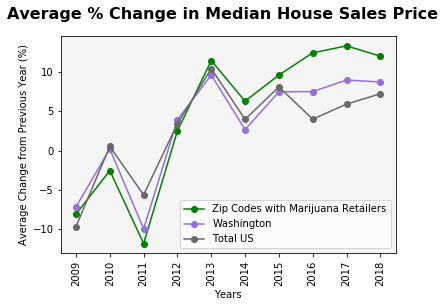

In [76]:
testfig,testax=plt.subplots()
x_axis=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
testax.plot(x_axis,z,marker='o',color='green',label='Zip Codes with Marijuana Retailers')
testax.plot(x_axis,us_wa_avg['WA_Percent_Change'].dropna(),label='Washington',marker='o',color='mediumpurple')
testax.plot(x_axis,us_wa_avg['US_Percent_Change'].dropna(),label='Total US',marker='o',color='dimgrey')

testfig.suptitle("Average % Change in Median House Sales Price", fontsize=16, fontweight="bold")
plt.legend(loc='best')
plt.xlabel("Years")
plt.ylabel("Average Change from Previous Year (%)")
plt.xticks(x_axis,rotation='vertical')
testax.set_facecolor('whitesmoke')
plt.show()

In [34]:
testdf=df[['98012_mjsales','98012_homeprice']]
testdf['PercChangeHP']=testdf['98012_homeprice'].pct_change()*100
testdf.reset_index(inplace=True)
testdf[['Year','Month']]=testdf['index'].str.split('-',expand=True)
testdf

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,index,98012_mjsales,98012_homeprice,PercChangeHP,Year,Month
0,2008-03,NaN,384900.0,NaN,2008,03
1,2008-04,NaN,375100.0,-2.546116,2008,04
2,2008-05,NaN,364300.0,-2.879232,2008,05
3,2008-06,NaN,374900.0,2.909690,2008,06
4,2008-07,NaN,368100.0,-1.813817,2008,07
5,2008-08,NaN,372600.0,1.222494,2008,08
6,2008-09,NaN,362700.0,-2.657005,2008,09
7,2008-10,NaN,372000.0,2.564103,2008,10
8,2008-11,NaN,357300.0,-3.951613,2008,11
9,2008-12,NaN,363400.0,1.707249,2008,12


In [35]:
# testdf['PercChangeHP']=testdf['98012_homeprice'].pct_change()*100
# testdf.reset_index(inplace=True)


In [36]:
# testdf[['Year','Month']]=testdf['index'].str.split('-',expand=True)
# testdf

In [37]:
avg_home_price=pd.DataFrame(testdf.groupby('Year')['98012_homeprice'].mean())

In [38]:
avg_home_price

,98012_homeprice
Year,
2008,369530.000000
2009,333891.666667
2010,314066.666667
2011,284825.000000
2012,302616.666667
2013,340883.333333
2014,361050.000000
2015,385775.000000
2016,434216.666667


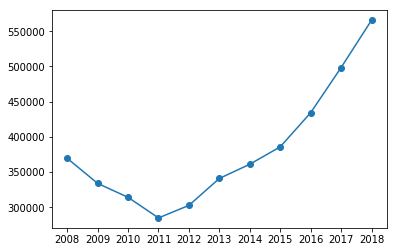

In [39]:
testfig,testax=plt.subplots()
testax.plot(avg_home_price.index.values,avg_home_price['98012_homeprice'],marker='o')
plt.show()

In [40]:
x=pd.DataFrame(list(df))
x[0]=x[0].str.split('_',expand=True)
y=x[0].unique()
y

array(['98002', '98003', '98004', '98006', '98012', '98020', '98021',
       '98026', '98027', '98028', '98033', '98034', '98036', '98037',
       '98038', '98042', '98043', '98052', '98055', '98056', '98057',
       '98072', '98087', '98103', '98105', '98106', '98107', '98109',
       '98112', '98116', '98117', '98118', '98121', '98122', '98125',
       '98133', '98136', '98144', '98155', '98168', '98178', '98198',
       '98201', '98203', '98204', '98208', '98223', '98252', '98258',
       '98275', '98290', '98296', '98321', '98329', '98373', '98387',
       '98404', '98405', '98406', '98408', '98409', '98424', '98444',
       '98445', '98499', '98604', '98660', '98661', '98663', '98664',
       '98665', '98682', '98683', '98684', '99026', '99202', '99205',
       '99206', '99208', '99216', '99217', '99218', '99223', '99224'],
      dtype=object)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


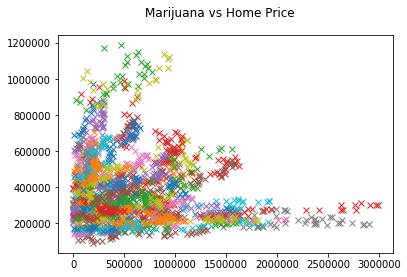

In [41]:
fig,ax=plt.subplots()
fig.suptitle("Marijuana vs Home Price")


for i in y:
    df1=df[['{0}_mjsales'.format(i),'{0}_homeprice'.format(i)]]
    df1.dropna(inplace=True)
    ax.plot(df1["{0}_mjsales".format(i)],df1["{0}_homeprice".format(i)],marker='x',linewidth=0)


plt.show()

In [42]:
df1=df[['98004_mjsales','98004_homeprice']]


In [43]:
df1.dropna(inplace=True)


C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


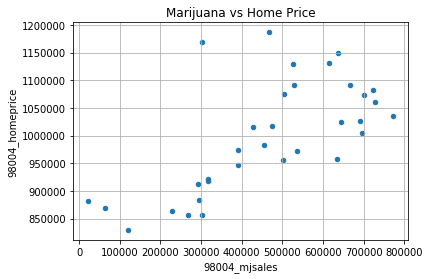

In [44]:
df1.plot(kind="scatter", x="98004_mjsales", y="98004_homeprice", grid=True,
              title="Marijuana vs Home Price")
plt.show()

In [45]:
df2=df[['98012_mjsales','98012_homeprice']]
df2.dropna(inplace=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


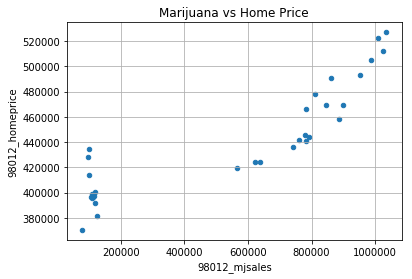

In [46]:
df2.plot(kind="scatter", x="98012_mjsales", y="98012_homeprice", grid=True,
              title="Marijuana vs Home Price")

plt.show()

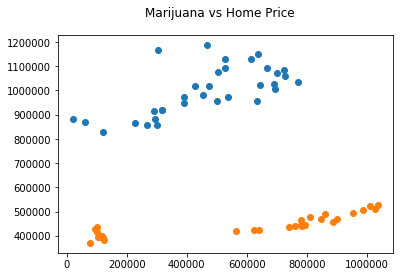

In [47]:
fig,ax=plt.subplots()
fig.suptitle("Marijuana vs Home Price")
ax.plot(df1["98004_mjsales"],df1["98004_homeprice"],marker='o',linewidth=0)
ax.plot(df2["98012_mjsales"],df2["98012_homeprice"],marker='o',linewidth=0)
plt.show()

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


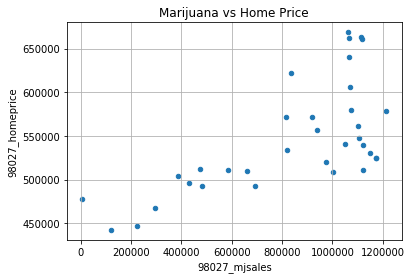

In [48]:
df3=df[['98027_mjsales','98027_homeprice']]
df3.dropna(inplace=True)
df3.plot(kind="scatter", x="98027_mjsales", y="98027_homeprice", grid=True,
              title="Marijuana vs Home Price")
plt.show()